# Mod 14 - R - Tibbles and ggplot

In [1]:
install.packages("tidyverse")

also installing the dependencies ‘isoband’, ‘ggplot2’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Histograms

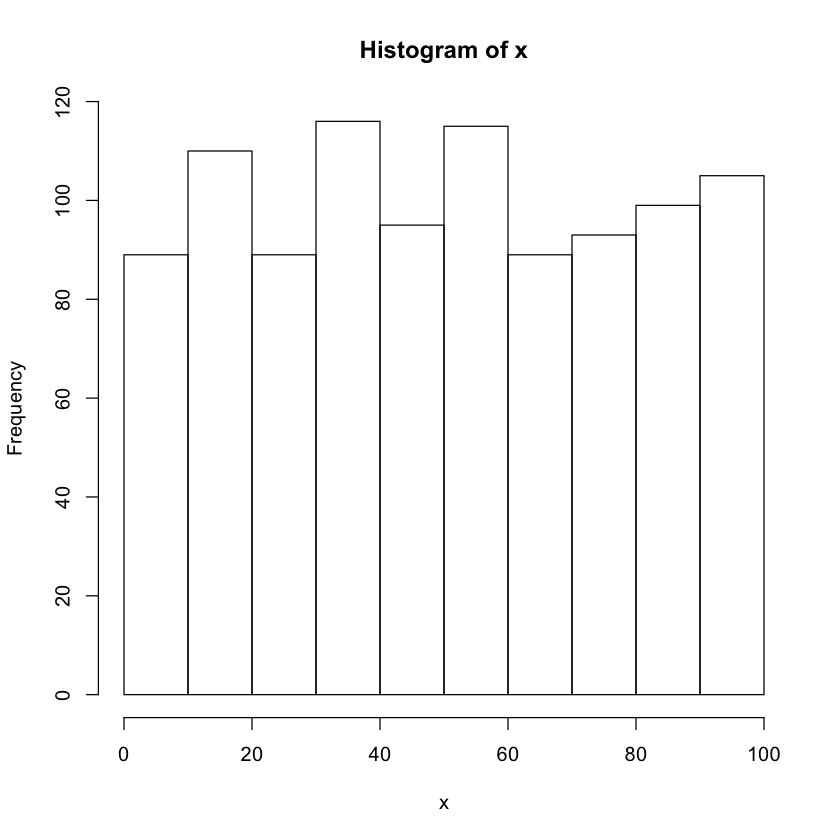

In [5]:
x <- sample(1:100, 1000, replace=TRUE)
hist(x)

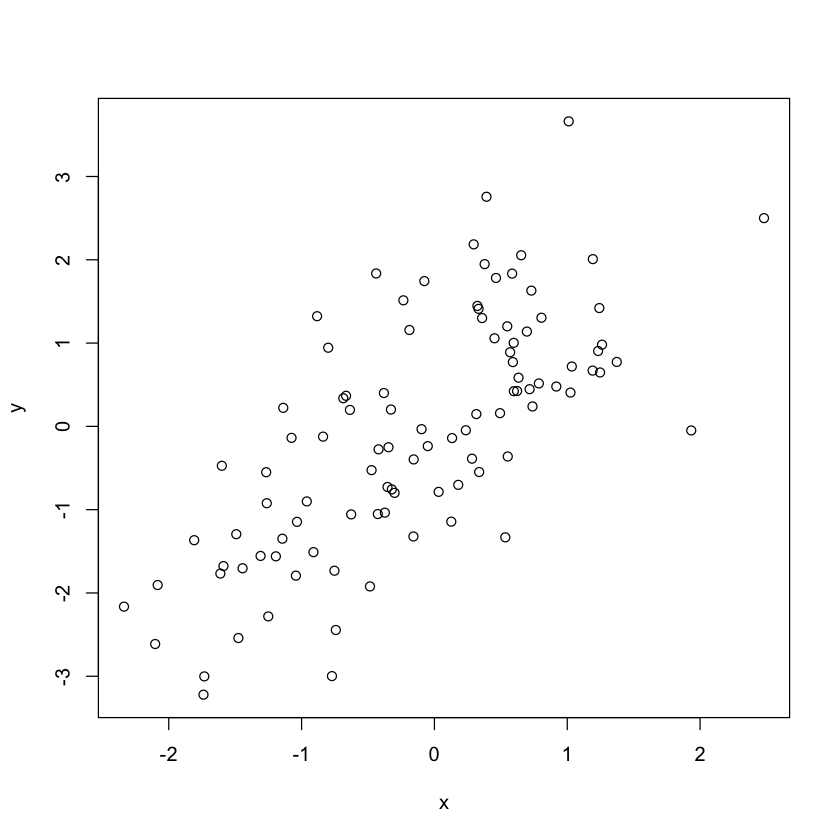

In [6]:
x <- rnorm(100, mean=0, sd=1) 
#rnorm generates multivariate normal random variates in the space X.
y <- x + rnorm(100, mean=0, sd=1)
plot(x,y)

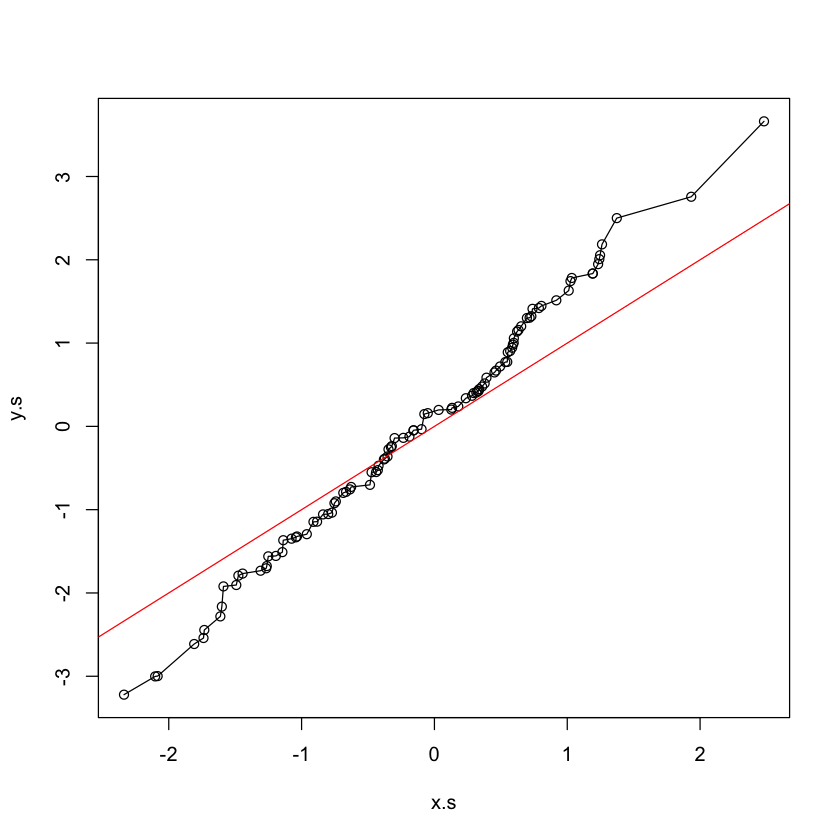

In [7]:
x.s <- sort(x)
y.s <- sort(y)
plot(x.s, y.s); lines(x.s, y.s); abline(a=0, b=1, col="red")

# Tibbles

Modern dataframes

Part of tidyverse

In [22]:
vignette("tibble") #runs documentation for tibble

In [8]:
#creating tibble
employees <- tibble(
  row.names = c("E1", "E2", "E3", "E4", "E5"),
  name = c("Rick", "Dan", "Alex", "Ryan", "John"),
  salary = c(623.3,515.2,611.0,729.0,843.25),
  start_date = as.Date(c("2012-01-01","2013-09-23","2014-11-15","2014-05-11","2015-03-27"))
  )
employees

row.names name salary start_date
1 E1        Rick 623.30 2012-01-01
2 E2        Dan  515.20 2013-09-23
3 E3        Alex 611.00 2014-11-15
4 E4        Ryan 729.00 2014-05-11
5 E5        John 843.25 2015-03-27

In [10]:
#converting dataframe into tibble
employees <- data.frame(
  row.names = c("E1", "E2", "E3", "E4", "E5"),
  name = c("Rick", "Dan", "Alex", "Ryan", "John"),
  salary = c(623.3,515.2,611.0,729.0,843.25),
  start_date = as.Date(c("2012-01-01","2013-09-23","2014-11-15","2014-05-11","2015-03-27"))
  )
employees <- as_tibble(employees)

In [11]:
data(diamonds) #getting diamonds dataset

In [12]:
diamonds

carat cut       color clarity depth table price x    y    z   
1     0.23  Ideal     E     SI2     61.5  55    326   3.95 3.98 2.43
2     0.21  Premium   E     SI1     59.8  61    326   3.89 3.84 2.31
3     0.23  Good      E     VS1     56.9  65    327   4.05 4.07 2.31
4     0.29  Premium   I     VS2     62.4  58    334   4.20 4.23 2.63
5     0.31  Good      J     SI2     63.3  58    335   4.34 4.35 2.75
6     0.24  Very Good J     VVS2    62.8  57    336   3.94 3.96 2.48
7     0.24  Very Good I     VVS1    62.3  57    336   3.95 3.98 2.47
8     0.26  Very Good H     SI1     61.9  55    337   4.07 4.11 2.53
9     0.22  Fair      E     VS2     65.1  61    337   3.87 3.78 2.49
10    0.23  Very Good H     VS1     59.4  61    338   4.00 4.05 2.39
11    0.30  Good      J     SI1     64.0  55    339   4.25 4.28 2.73
12    0.23  Ideal     J     VS1     62.8  56    340   3.93 3.90 2.46
13    0.22  Premium   F     SI1     60.4  61    342   3.88 3.84 2.33
14    0.31  Ideal     J     SI2     62.2  54    344   4.35 4.37 2.71
15    0.20  Premium   E     SI2     60.2  62    345   3.79 3.75 2.27
16    0.32  Premium   E     I1      60.9  58    345   4.38 4.42 2.68
17    0.30  Ideal     I     SI2     62.0  54    348   4.31 4.34 2.68
18    0.30  Good      J     SI1     63.4  54    351   4.23 4.29 2.70
19    0.30  Good      J     SI1     63.8  56    351   4.23 4.26 2.71
20    0.30  Very Good J     SI1     62.7  59    351   4.21 4.27 2.66
21    0.30  Good      I     SI2     63.3  56    351   4.26 4.30 2.71
22    0.23  Very Good E     VS2     63.8  55    352   3.85 3.92 2.48
23    0.23  Very Good H     VS1     61.0  57    353   3.94 3.96 2.41
24    0.31  Very Good J     SI1     59.4  62    353   4.39 4.43 2.62
25    0.31  Very Good J     SI1     58.1  62    353   4.44 4.47 2.59
26    0.23  Very Good G     VVS2    60.4  58    354   3.97 4.01 2.41
27    0.24  Premium   I     VS1     62.5  57    355   3.97 3.94 2.47
28    0.30  Very Good J     VS2     62.2  57    357   4.28 4.30 2.67
29    0.23  Very Good D     VS2     60.5  61    357   3.96 3.97 2.40
30    0.23  Very Good F     VS1     60.9  57    357   3.96 3.99 2.42
...   ...   ...       ...   ...     ...   ...   ...   ...  ...  ... 
53911 0.70  Premium   E     SI1     60.5  58    2753  5.74 5.77 3.48
53912 0.57  Premium   E     IF      59.8  60    2753  5.43 5.38 3.23
53913 0.61  Premium   F     VVS1    61.8  59    2753  5.48 5.40 3.36
53914 0.80  Good      G     VS2     64.2  58    2753  5.84 5.81 3.74
53915 0.84  Good      I     VS1     63.7  59    2753  5.94 5.90 3.77
53916 0.77  Ideal     E     SI2     62.1  56    2753  5.84 5.86 3.63
53917 0.74  Good      D     SI1     63.1  59    2753  5.71 5.74 3.61
53918 0.90  Very Good J     SI1     63.2  60    2753  6.12 6.09 3.86
53919 0.76  Premium   I     VS1     59.3  62    2753  5.93 5.85 3.49
53920 0.76  Ideal     I     VVS1    62.2  55    2753  5.89 5.87 3.66
53921 0.70  Very Good E     VS2     62.4  60    2755  5.57 5.61 3.49
53922 0.70  Very Good E     VS2     62.8  60    2755  5.59 5.65 3.53
53923 0.70  Very Good D     VS1     63.1  59    2755  5.67 5.58 3.55
53924 0.73  Ideal     I     VS2     61.3  56    2756  5.80 5.84 3.57
53925 0.73  Ideal     I     VS2     61.6  55    2756  5.82 5.84 3.59
53926 0.79  Ideal     I     SI1     61.6  56    2756  5.95 5.97 3.67
53927 0.71  Ideal     E     SI1     61.9  56    2756  5.71 5.73 3.54
53928 0.79  Good      F     SI1     58.1  59    2756  6.06 6.13 3.54
53929 0.79  Premium   E     SI2     61.4  58    2756  6.03 5.96 3.68
53930 0.71  Ideal     G     VS1     61.4  56    2756  5.76 5.73 3.53
53931 0.71  Premium   E     SI1     60.5  55    2756  5.79 5.74 3.49
53932 0.71  Premium   F     SI1     59.8  62    2756  5.74 5.73 3.43
53933 0.70  Very Good E     VS2     60.5  59    2757  5.71 5.76 3.47
53934 0.70  Very Good E     VS2     61.2  59    2757  5.69 5.72 3.49
53935 0.72  Premium   D     SI1     62.7  59    2757  5.69 5.73 3.58
53936 0.72  Ideal     D     SI1     60.8  57    2757  5.75 5.76 3.50
5393

In [23]:
?diamonds #documentation over diamonds dataset

In [ ]:
View(diamonds) #only in R Studio

In [14]:
summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

In [16]:
dim(diamonds) #observations, number of variables

[1] 53940    10

# ggplot

Data visualization package

data = raw data

geometrics rep with geom_ = geometric shape to rep data

aesthetics rep with aes() = aesthetics of geometric and statistical objs (color, size, shape, position)

scale rep with scale_ = maps data and aes dimensions (data range, plot width, factor values, colors)

In [19]:
library(ggplot2)

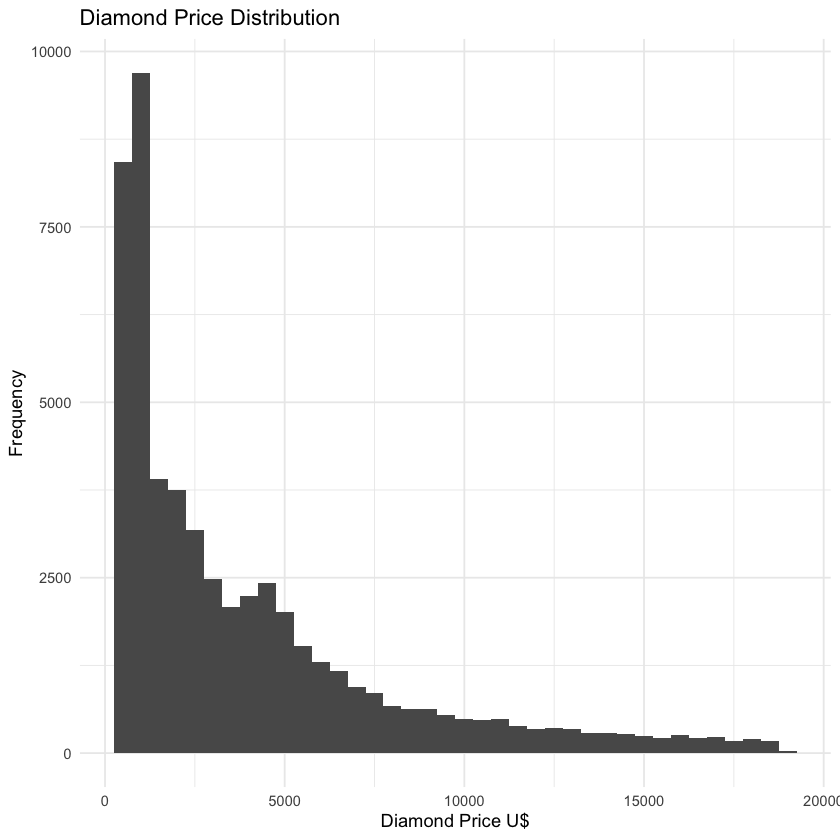

In [20]:
ggplot(data=diamonds) + geom_histogram(binwidth=500, aes(x=price)) + ggtitle("Diamond Price Distribution") + xlab("Diamond Price U$") + ylab("Frequency") + theme_minimal()

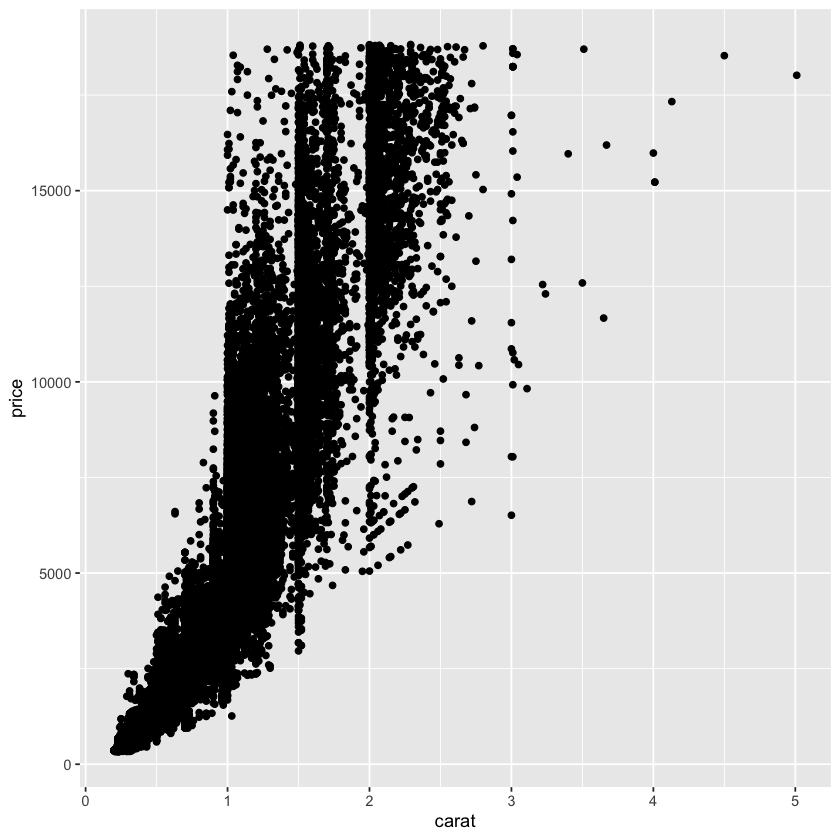

In [21]:
ggplot(diamonds, aes(x=carat, y=price)) + geom_point()

## Plots as Objects

ggplot() creates an object whenever it is created

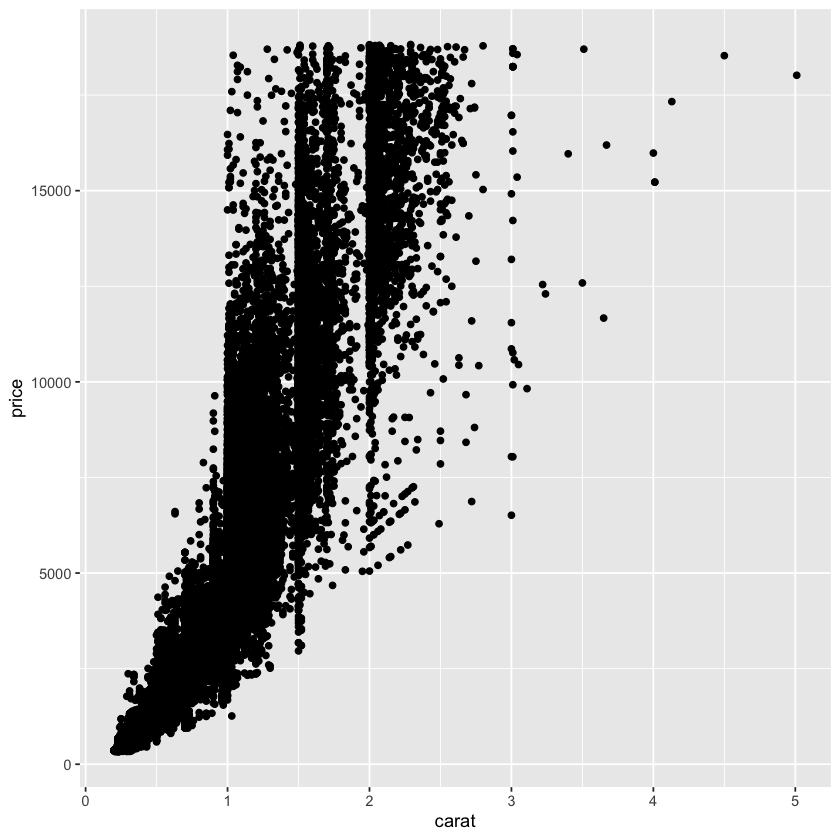

In [24]:
p <- ggplot(diamonds, aes(x=carat, y=price))+geom_point()
p

## Saving plots

Use ggsave() to save plot as an image

Saves last plot displayed

Guesses graphics device from extension; device can be pdf, jpeg, etc

## Aesthetic Mappings

Each type of geom accepts a subset of all aesthetics.

Can do following:
1. position (on x and y axes)
2. color ("outside" color)
3. fill ("inside" color)
4. shape of data points
5. linetype
6. size

### Adding color

Color points based on clarity

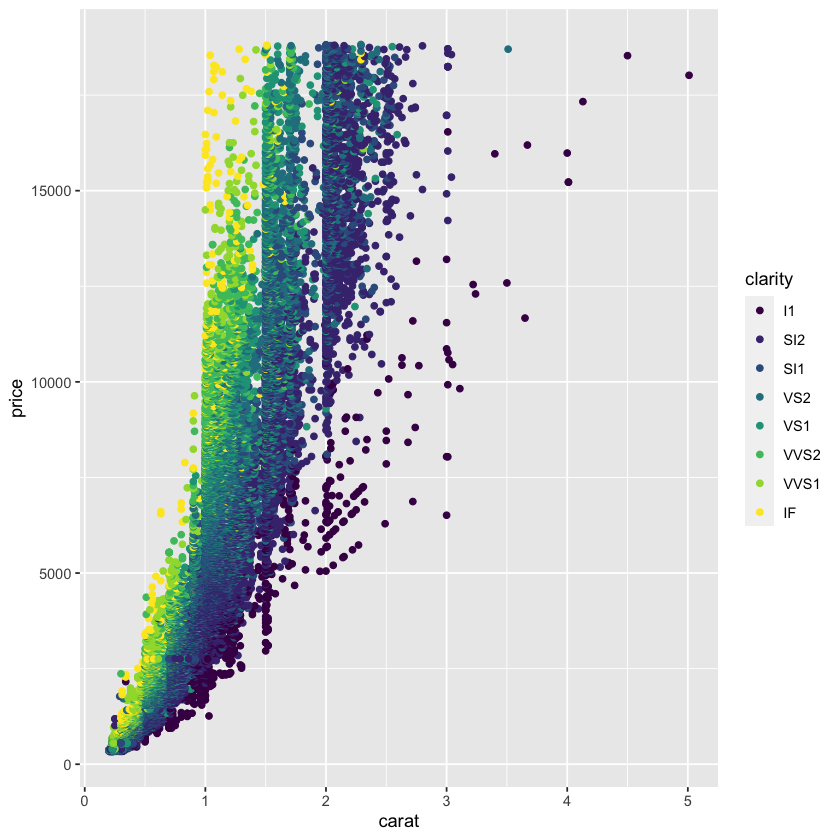

In [25]:
ggplot(diamonds, aes(x=carat,y=price,color=clarity)) +geom_point()

Warning message:
“Using shapes for an ordinal variable is not advised”

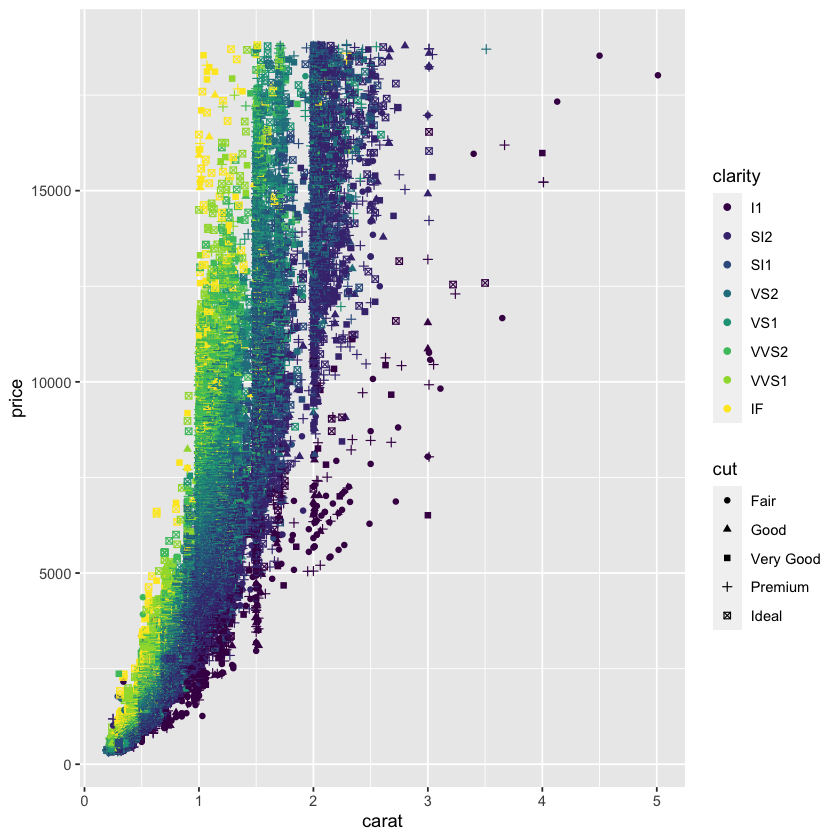

In [26]:
# adding shape
ggplot(diamonds, aes(x=carat,y=price,color=clarity,shape=cut)) +geom_point()

### Facets

Facet partitions a plot into a matrix of panels. Each panel shows a different subset of the data. 

Warning message:
“Using shapes for an ordinal variable is not advised”

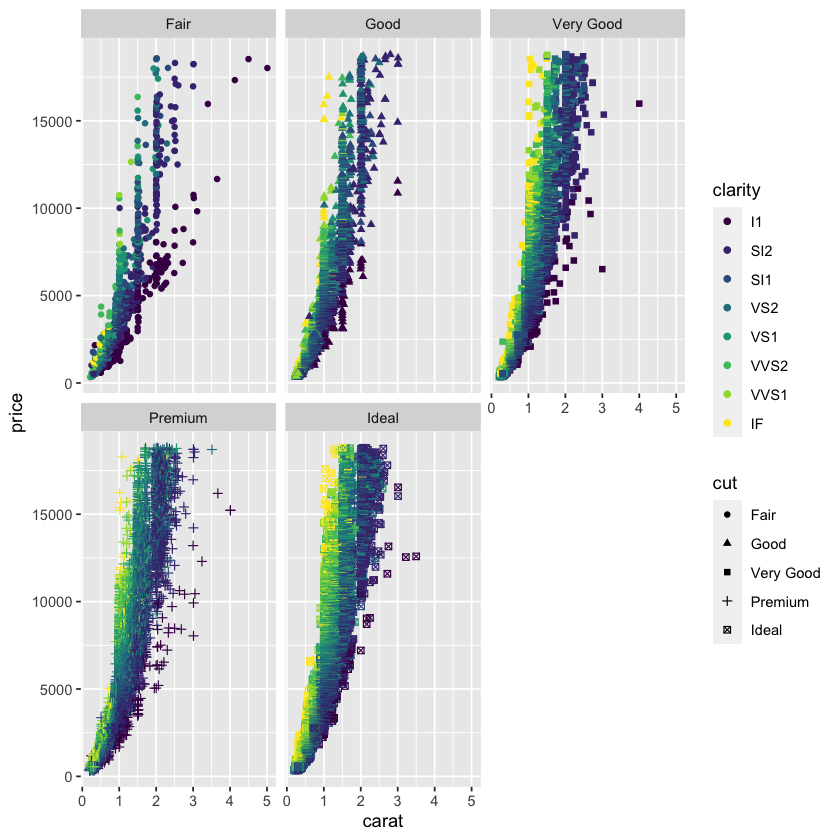

In [27]:
# adding categorical var to split plots into facets
# splitting plits based on cut column
ggplot(diamonds, aes(x=carat,y=price, color=clarity, shape=cut)) + geom_point() + facet_wrap(~ cut)

Warning message:
“Using shapes for an ordinal variable is not advised”

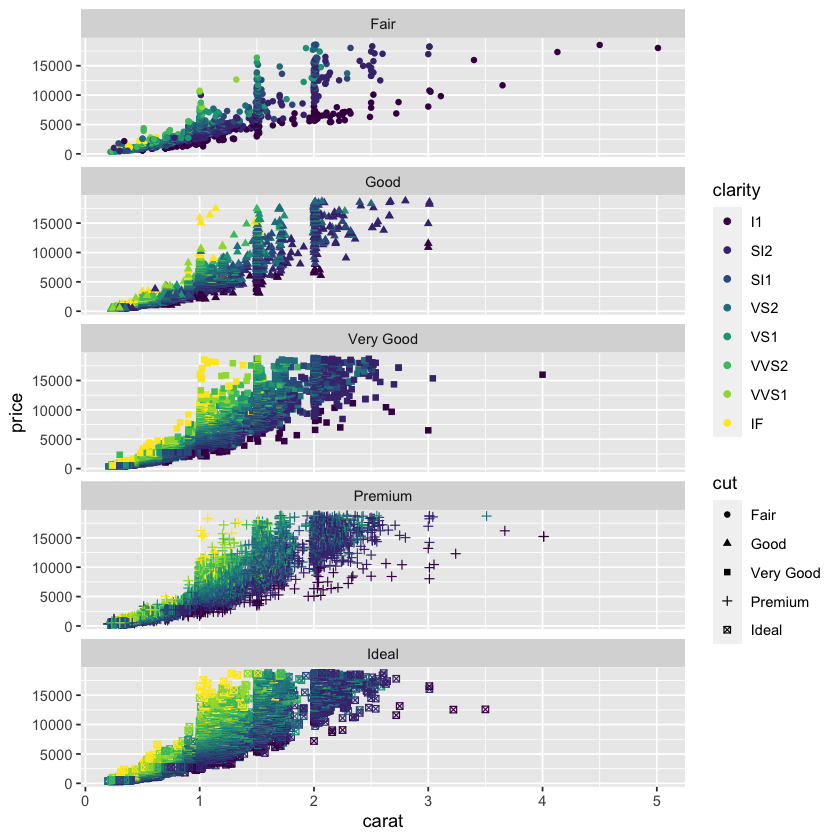

In [28]:
# facets for combinations of variable
# nrow swaps the view of the facets
ggplot(diamonds, aes(x=carat,y=price,color=clarity,shape=cut)) +geom_point() + facet_wrap(~ cut, nrow=5)

## Geometric Objects

Marks placed on plot. Ex:
1. points (geom_point: scatter points, dot plots)
2. lines (geom_line: time series; geom_smooth: trend lines)
3. boxplot (geom_boxplot: boxplot)

There must be 1 geom_ but there's no upper limit.

Add more geoms with plus sign

In [29]:
# all available geom objects
help.search("geom_", package="ggplot2")

## Data Smoothing or trends

Uses an algorithm to remove noise from data set, allowing important patterns to stand out.

Can be used to predict trends, like for securities price. 

Different data smoothing models include random method, random walk, and moving average

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


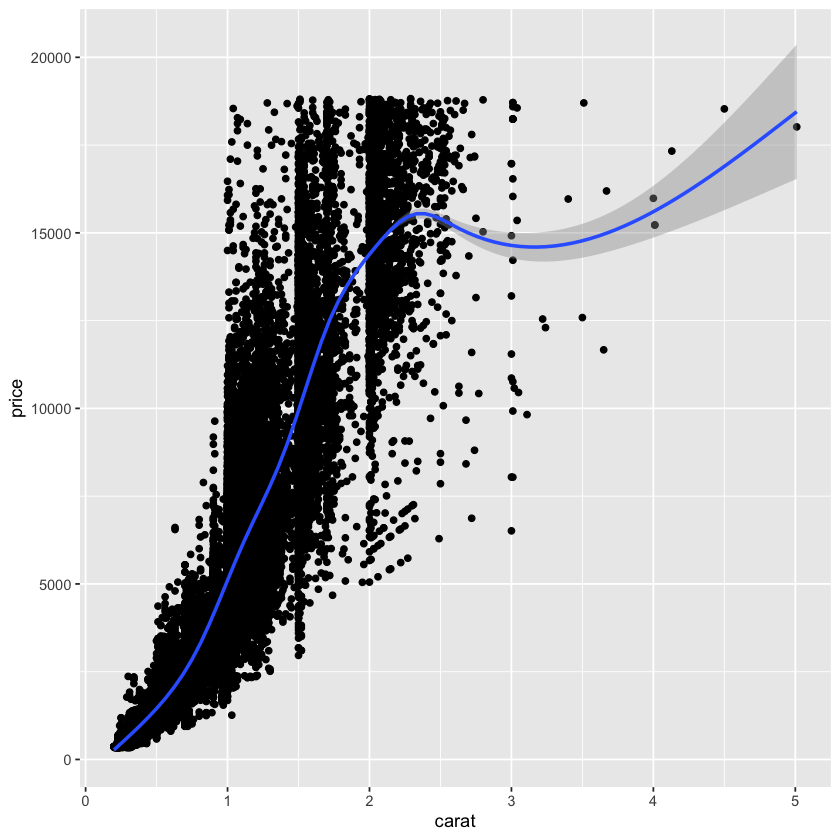

In [30]:
ggplot(diamonds, aes(x=carat,y=price)) + geom_point() + geom_smooth()

Shaded area represents the uncertainity in this smoothing curve

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


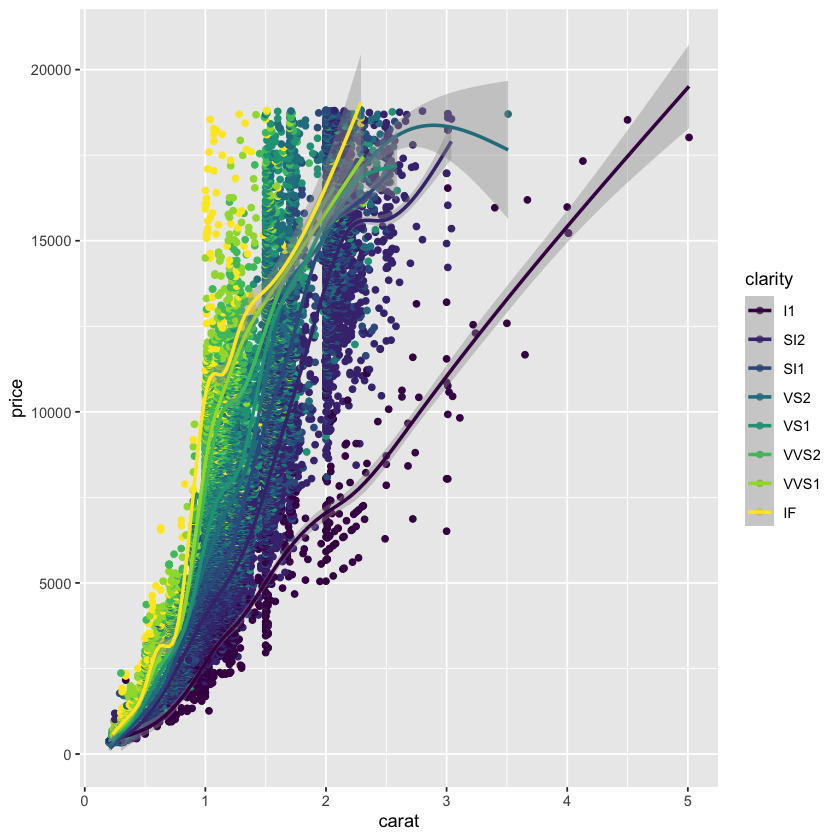

In [31]:
ggplot(diamonds, aes(x=carat,y=price, color=clarity)) + geom_point() + geom_smooth()

Creates one smoothing curve per color

## Changing the smoothing method

`geom_smooth()` using formula 'y ~ x'


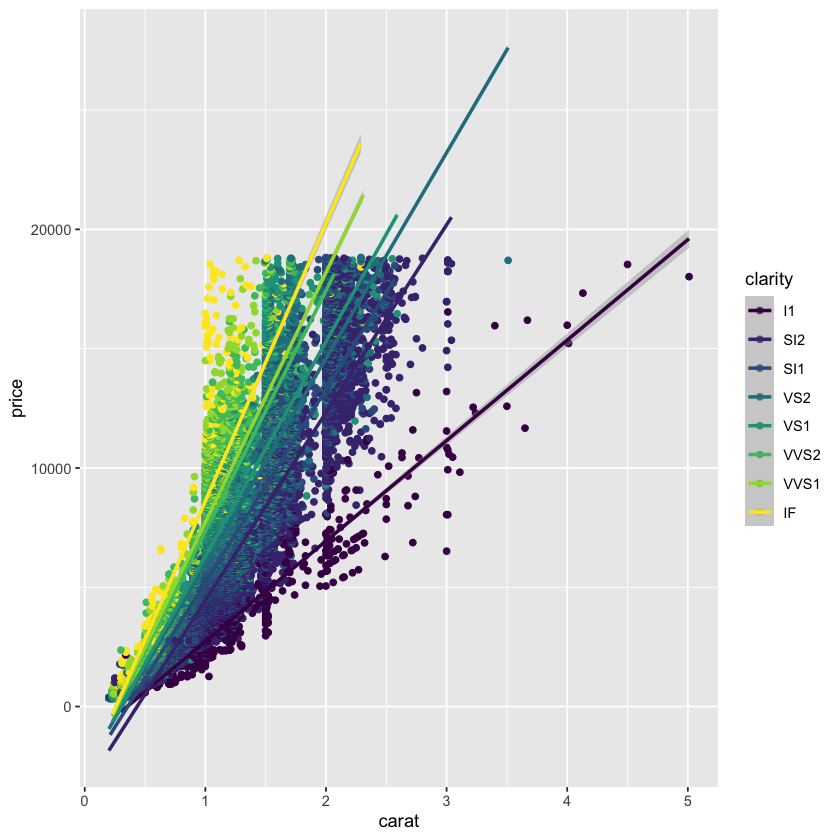

In [32]:
ggplot(diamonds, aes(x=carat,y=price, color=clarity)) + geom_point() + geom_smooth(method="lm")

In [33]:
help(geom_smooth, ggplot2)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


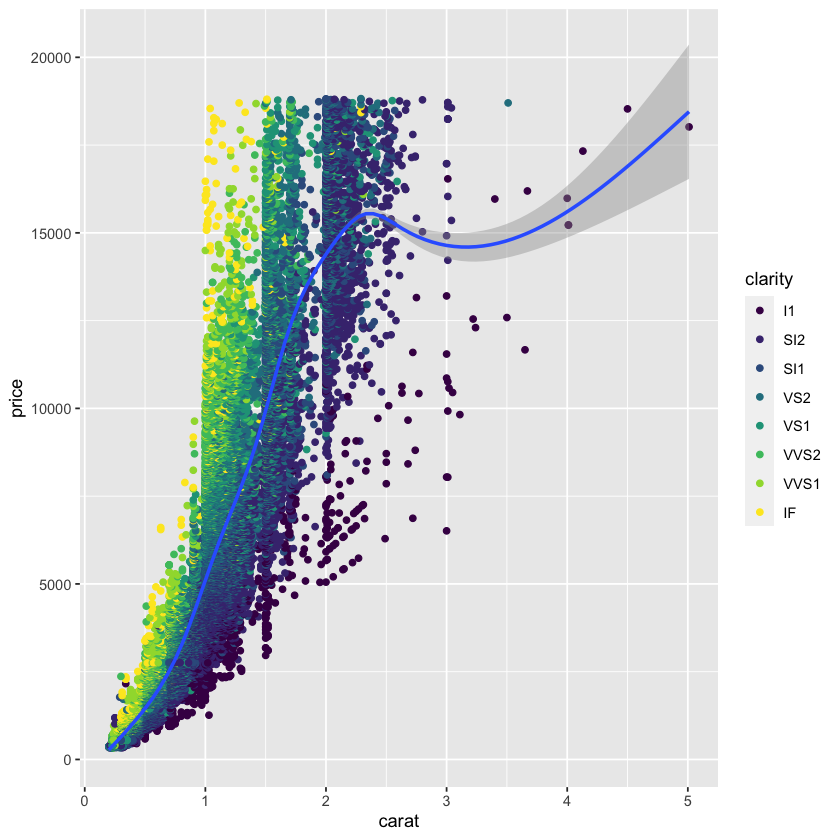

In [34]:
# aesthetics specific for a single geom obj

ggplot(diamonds, aes(x=carat,y=price)) + geom_point(aes(color=clarity)) + geom_smooth()

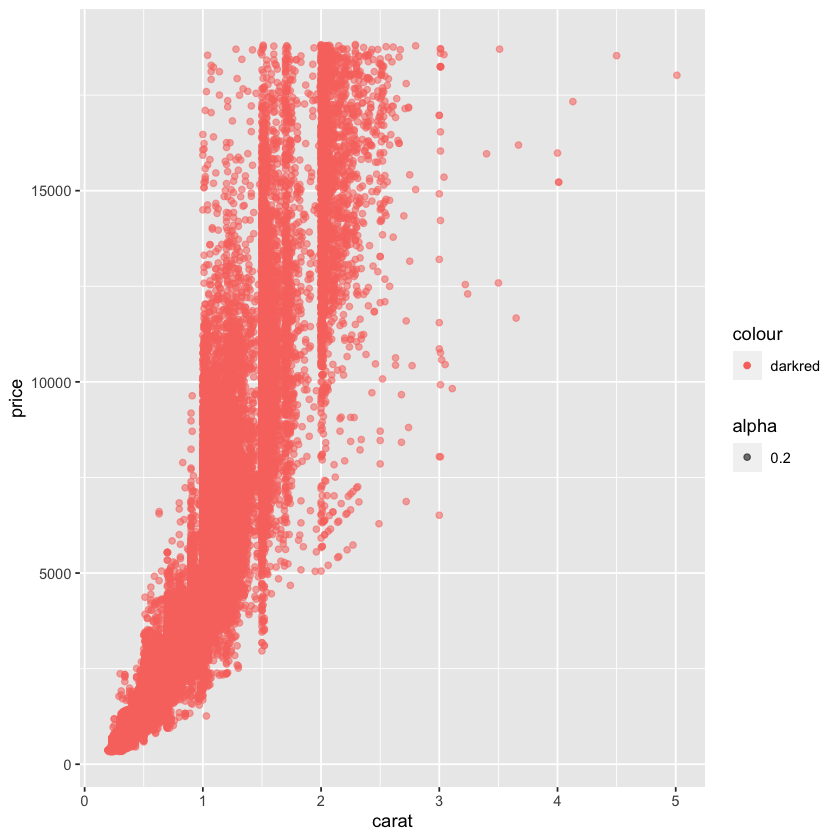

In [36]:
# aesthetics mappings vs fixed aesthetics
# geom_point assigns all plints to a color of alpha 0.2
ggplot(diamonds, aes(x=carat,y=price)) + geom_point(aes(color="darkred", alpha=0.2))

## Histograms with ggplot


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


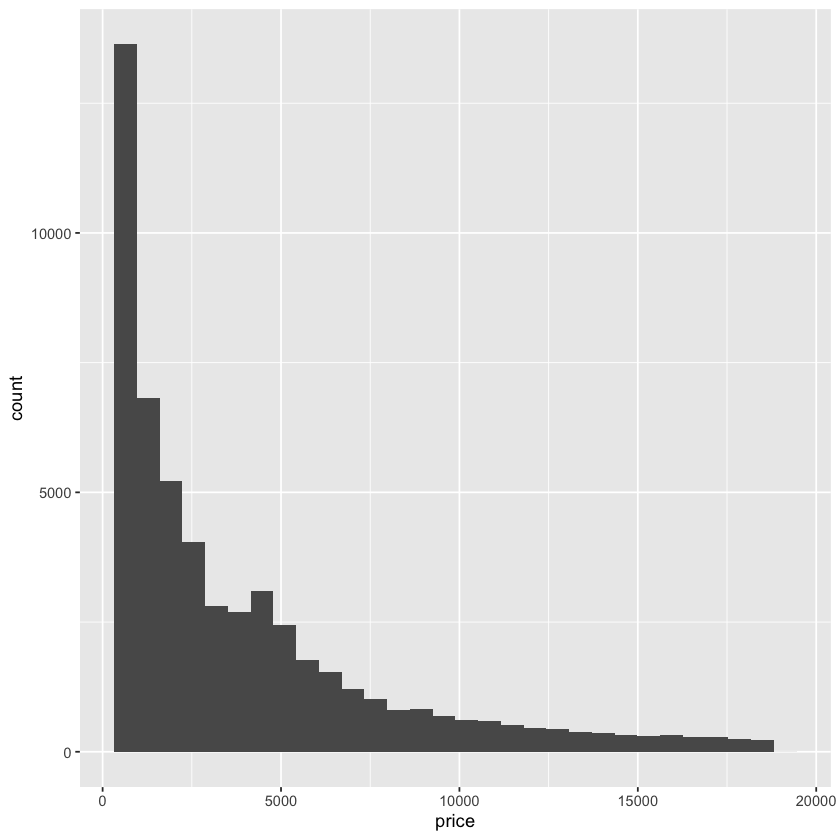

In [37]:
ggplot(diamonds, aes(x=price)) + geom_histogram()

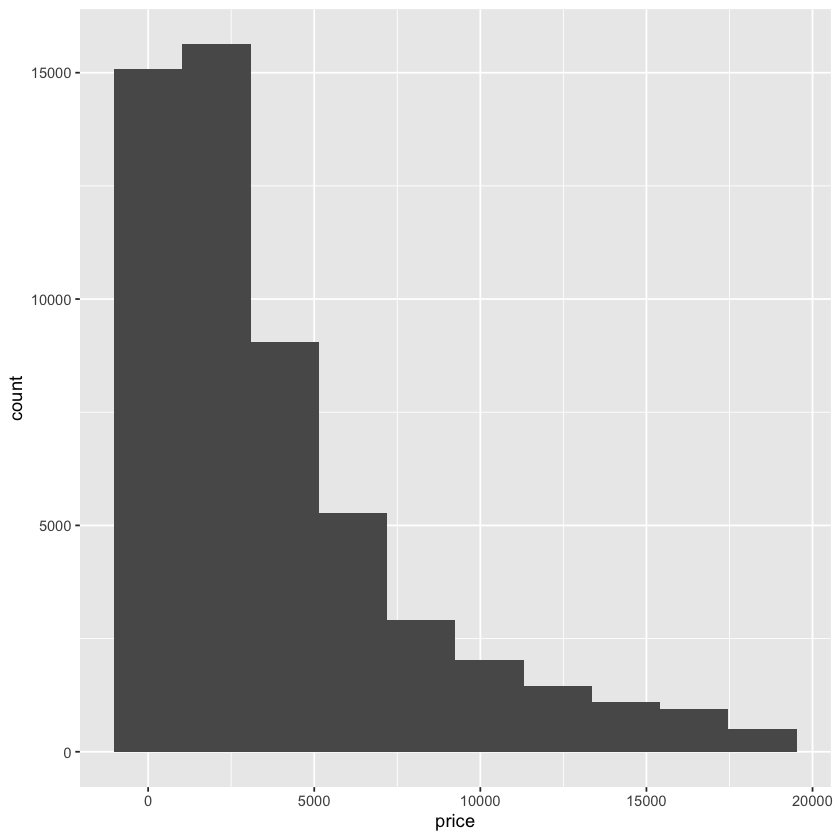

In [38]:
# specify number of bins or binswidth


ggplot(diamonds, aes(x=price)) + geom_histogram(bins=10)

## Bar Charts

counts number of instances of each discrete class

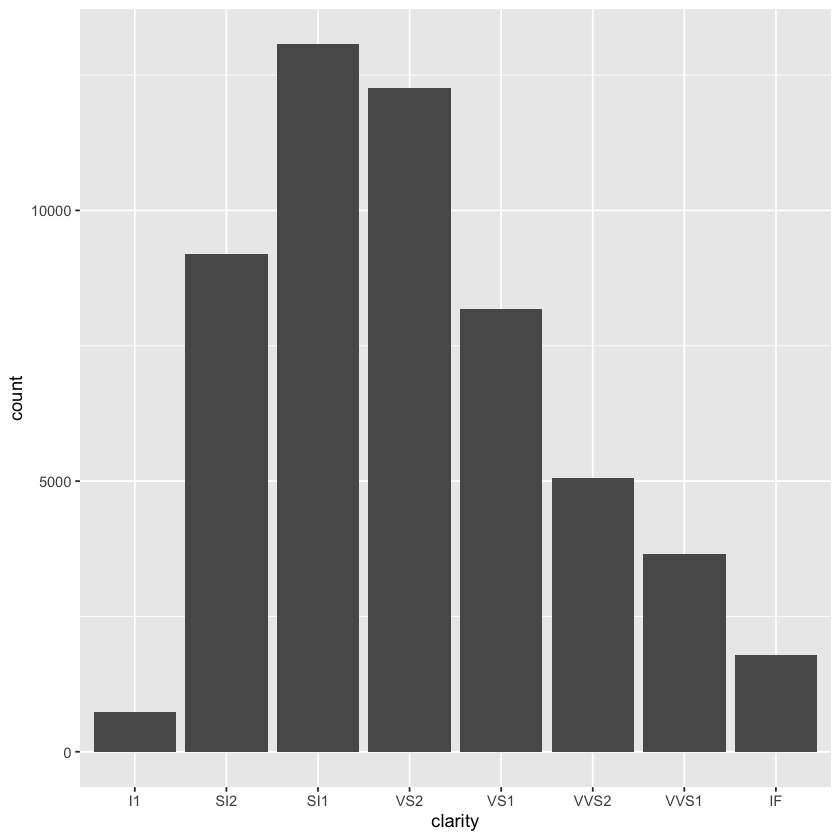

In [41]:
ggplot(diamonds, aes(x=clarity)) + geom_bar()
# aes(x=price)

## Boxplots

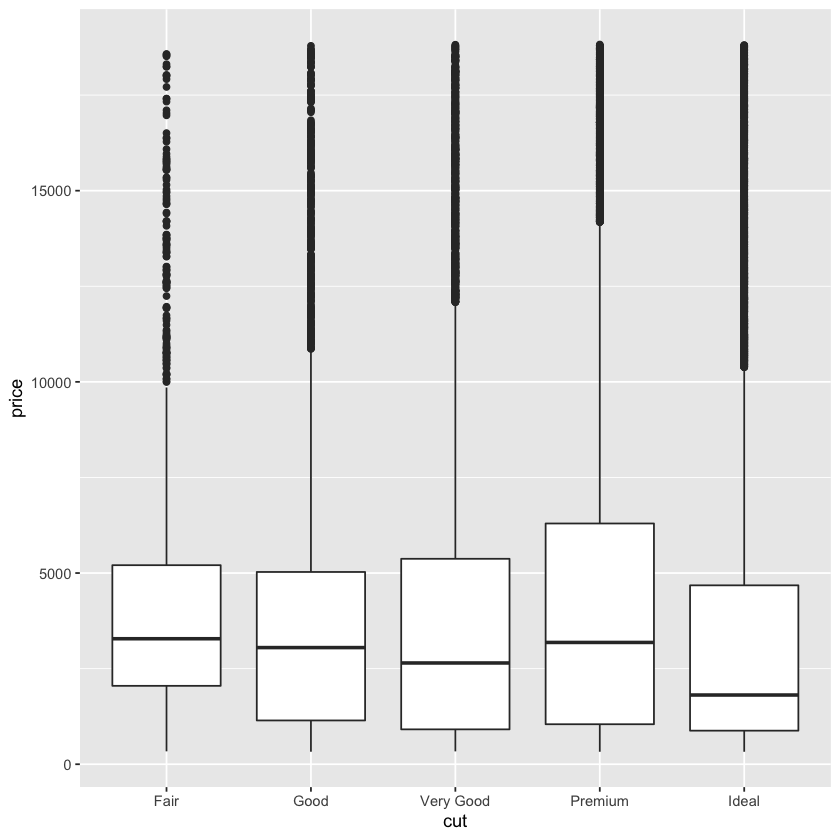

In [42]:
ggplot(diamonds, aes(cut, price)) + geom_boxplot()

## Position Adjustments

Used to adjust position of each geom.

Available adjustments:
1. position_identity: default
2. position_jitter: adds small amount of random variation
3. position_dodge: default of boxplot
4. position_stack: default of geom_bar and histogram
5. position_fill: default of geom_bar and histogram

Overplotting leads to many points overlapping each other

Variables are categorical but sometimes rounding causes overplotting

In [43]:
p0 <- ggplot(diamonds, aes(x=cut,y=depth))
p1 <- p0 + geom_point()
p2 <- p0 + geom_point(position="jitter")

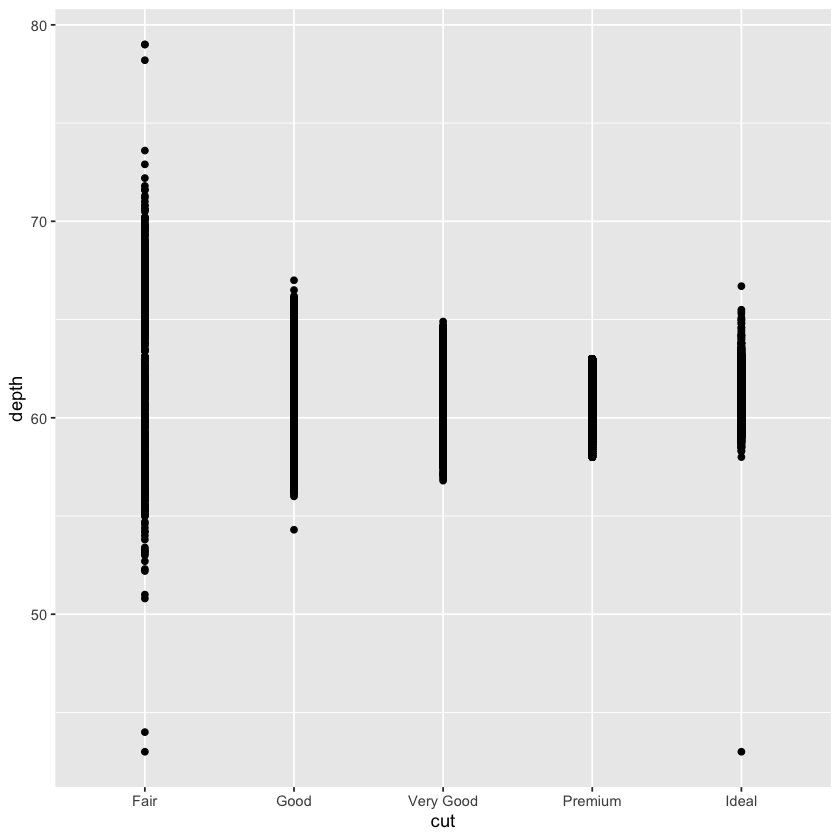

In [44]:
p1

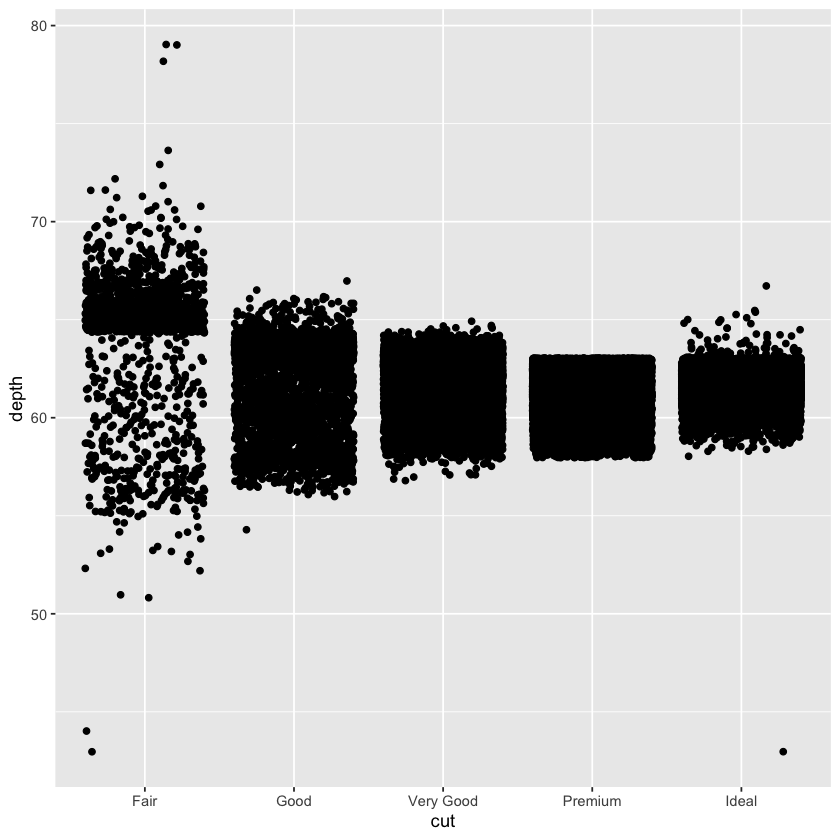

In [45]:
p2

## Scales 

scales for:
1. position
2. color and fill
3. size
4. shape
5. line type

### Scales for axes

Scales control mapping from data to aesthetics. 

In [47]:
# square root transformation on the y-axis
p1 <- ggplot(diamonds, aes(x=carat,y=price)) + geom_point()
p2 <- p1 + scale_y_sqrt()

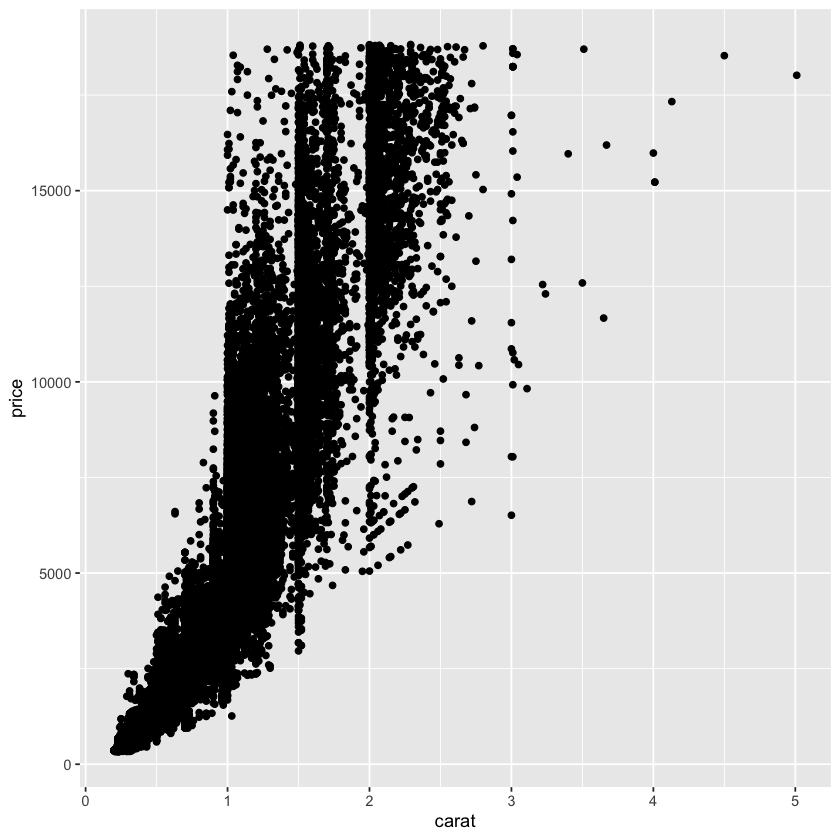

In [48]:
p1

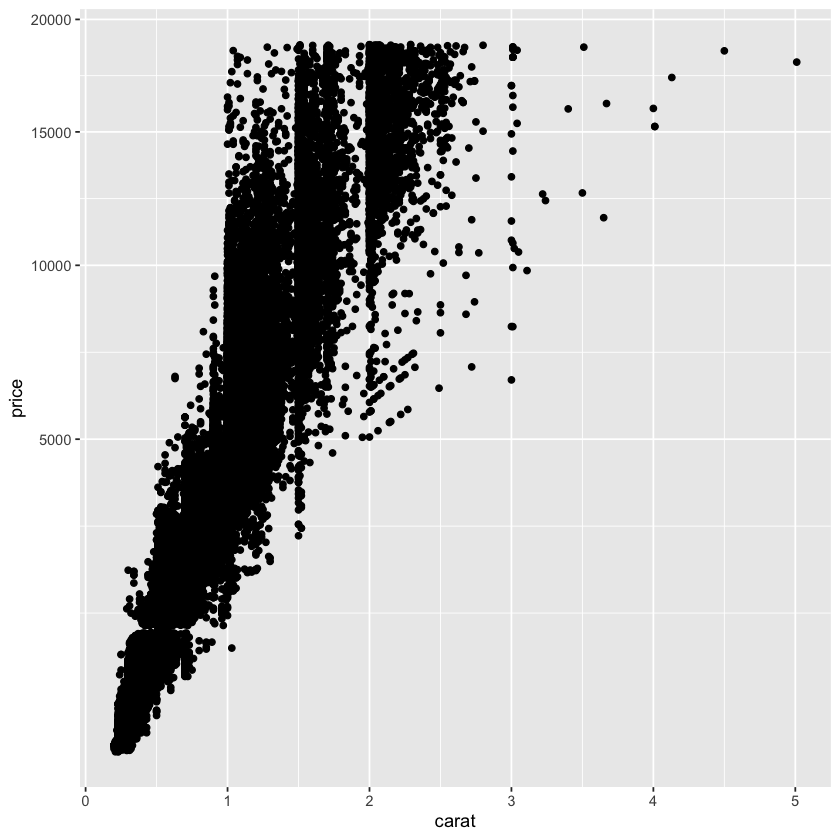

In [49]:
p2